In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Load and read the 'Bigfoot.csv file
df = pd.read_csv('Bike_Sales.csv')

#  Display the first 5 rows
df.head(5)

# Display the last 5 rows
df.tail()

# Display the number of rows and columns
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display all column names
df.columns.tolist()


This dataset has 13 rows and 6 columns.
Dataset Shape: (13, 6)

Data Types for Each Column:
Date                object
Age_Group           object
Product_Category    object
Order_Quantity       int64
Unit_Price          object
Revenue             object
dtype: object


In [ ]:
# Get concise summary of the DataFrame
df.info()

# Show descriptive statistics for numerical columns
df.describe()

# Show descriptive statistics for object (string) columns
df.describe(include='object')

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              13 non-null     object
 1   Age_Group         13 non-null     object
 2   Product_Category  13 non-null     object
 3   Order_Quantity    13 non-null     int64 
 4   Unit_Price        13 non-null     object
 5   Revenue           13 non-null     object
dtypes: int64(1), object(5)
memory usage: 756.0+ bytes


Date                0
Age_Group           0
Product_Category    0
Order_Quantity      0
Unit_Price          0
Revenue             0
dtype: int64

In [ ]:
# Task 2

# Separate numerical and categorical columns for clarity
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# List columns that we would EXPECT to be numerical 
expected_numeric_cols = ['Unit_Price', 'Product_Category', 'Order_Quantity', 'Revenue', 'Year', 'Age_Group']

# Check their actual dtypes
for col in expected_numeric_cols:
    if col in df.columns:
        print(f"Column '{col}' has dtype: {df[col].dtype}")
        
# Try to convert it to numeric, and errors='coerce' will turn problematic values into NaN
test_series = pd.to_numeric(df['Unit_Price'], errors='coerce')

# Now, find the rows that couldn't be converted (i.e., are now NaN but weren't originally)
failed_conversion = df[test_series.isna() & df['Unit_Price'].notna()]

if not failed_conversion.empty:
    print(f"Found {len(failed_conversion)} problematic entries in 'Unit_Price':")
    print(failed_conversion[['Unit_Price']].head())
else:
    print("No conversion errors found in 'Unit_Price'. Moving on.")
    
    # Create a clean DataFrame for analysis
df_clean = df.copy()

# List of columns to clean (add all expected numeric columns here)
cols_to_clean = ['Unit_Price', 'Product_Category', 'Order_Quantity', 'Revenue', 'Date', 'Age_Group']


for col in cols_to_clean:
    if col in df_clean.columns:
        # First, ensure it's a string, then remove common non-numeric characters
        df_clean[col] = df_clean[col].astype(str)
        df_clean[col] = df_clean[col].str.replace('$', '', regex=False)
        df_clean[col] = df_clean[col].str.replace(',', '', regex=False)
        df_clean[col] = df_clean[col].str.replace(' ', '', regex=False)
        
        # Now convert to numeric, forcing errors to NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Verify the new dtypes
print("\nData Types AFTER Cleaning:")
print(df_clean[cols_to_clean].dtypes)

# Get stats for all cleaned numerical columns
numerical_stats = df_clean[cols_to_clean].describe()
numerical_stats

Column 'Unit_Price' has dtype: object
Column 'Product_Category' has dtype: object
Column 'Order_Quantity' has dtype: int64
Column 'Revenue' has dtype: object
Column 'Age_Group' has dtype: object
Found 13 problematic entries in 'Unit_Price':
   Unit_Price
0  $1,120.00 
1  $3,578.00 
2  $2,443.00 
3  $2,295.00 
4    $540.00 

Data Types AFTER Cleaning:
Unit_Price          float64
Product_Category    float64
Order_Quantity        int64
Revenue             float64
Date                float64
Age_Group           float64
dtype: object


,Unit_Price,Product_Category,Order_Quantity,Revenue,Date,Age_Group
count,13.000000,0.0,13.000000,13.000000,0.0,0.0
mean,1748.615385,NaN,22.923077,43764.307692,NaN,NaN
std,1088.484844,NaN,12.392616,46356.906439,NaN,NaN
min,540.000000,NaN,10.000000,5940.000000,NaN,NaN
25%,1120.000000,NaN,12.000000,15680.000000,NaN,NaN
50%,1120.000000,NaN,20.000000,22950.000000,NaN,NaN
75%,2443.000000,NaN,30.000000,71560.000000,NaN,NaN
max,3578.000000,NaN,47.000000,168166.000000,NaN,NaN


In [ ]:
# Check the mean
mean_revenue_by_category = df_clean.groupby('Product_Category')['Revenue'].mean().round(2).sort_values(ascending=False)
print("Average Revenue by Product Category:")
print(mean_revenue_by_category)

mean_price_by_age = df_clean.groupby('Age_Group')['Unit_Price'].mean().round(2)
print("\nAverage Unit Price by Age Group:")
print(mean_price_by_age)

# Finding: Is there a difference in average spending between the age group?
if 'Age_Group' in df_clean.columns:
    avg_rev_by_age = df_clean.groupby('Age_Group')['Revenue'].mean().round(2)
    print("\nAverage Revenue by Age Group:")
    print(avg_rev_by_age)

# Finding: Which country has the most valuable average order?
avg_order_value = df_clean.groupby('Order_Quantity')['Revenue'].mean().round(2).sort_values(ascending=False)
print("\nAverage Order Value (Revenue) by Order Quantity:")
print(avg_order_value.head(10)) # Show top 10

Average Revenue by Product Category:
Series([], Name: Revenue, dtype: float64)

Average Unit Price by Age Group:
Series([], Name: Unit_Price, dtype: float64)

Average Revenue by Age Group:
Series([], Name: Revenue, dtype: float64)

Average Order Value (Revenue) by Order Quantity:
Order_Quantity
47    168166.0
40     91800.0
20     71560.0
30     53445.0
10     23690.0
32     17280.0
14     15680.0
28     15120.0
12     13440.0
11      5940.0
Name: Revenue, dtype: float64


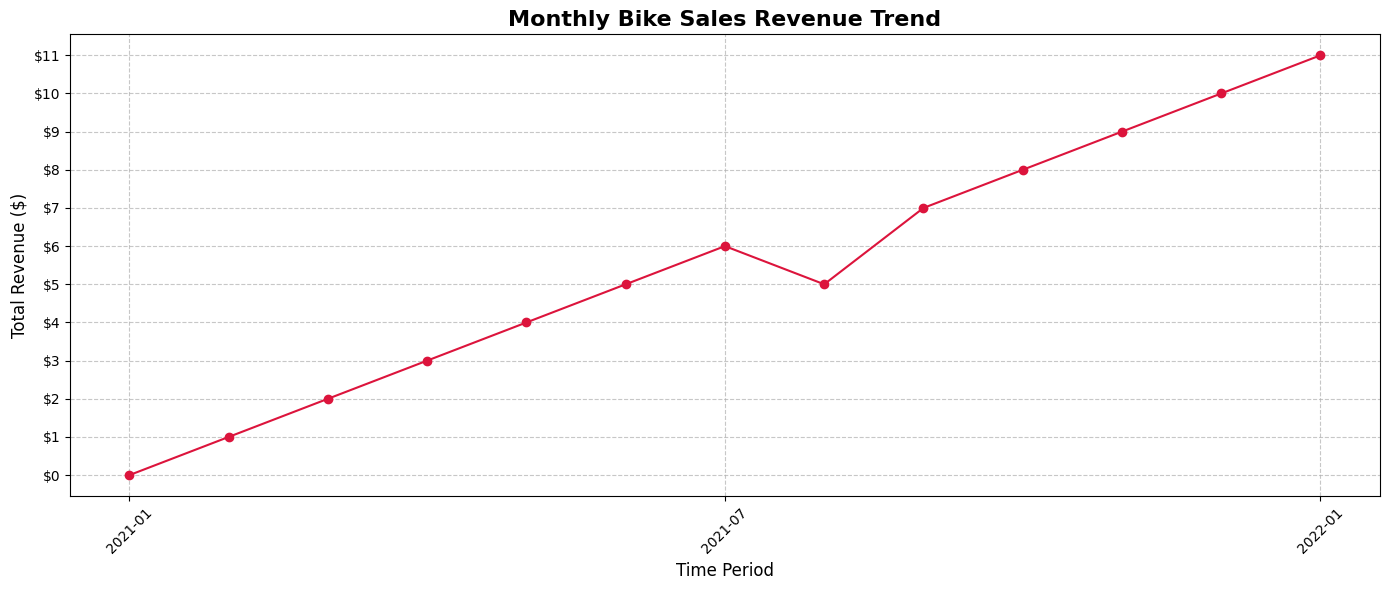

In [65]:
# Task 3

# Convert to datetime and extract Year-Month for a monthly trend
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Date'] = df['Date'].dt.to_period('M').astype(str) # Creates '2023-01'

# Aggregate by YearMonth
monthly_data = df.groupby('Date')['Revenue'].sum()

plt.figure(figsize=(14, 6))
plt.plot(range(len(monthly_data)), monthly_data.values, marker='o', color='crimson')
plt.title('Monthly Bike Sales Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format Y-axis as currency
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

# Select a subset of x-axis labels to avoid crowding (e.g., every 6th month)
n = 6  # Show every 6th label
plt.xticks(ticks=range(0, len(monthly_data), n), labels=monthly_data.index[::n], rotation=45)

plt.tight_layout()
plt.show()

Data cleaned and ready.
Age Groups in the dataset:
['Adults (35-64)' 'Young Adults (25-34)' 'Youth (<25)']


C:\Users\Phiwokuhle\AppData\Local\Temp\ipykernel_15840\3318815617.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax2.boxplot(boxplot_data, labels=age_groups_sorted)


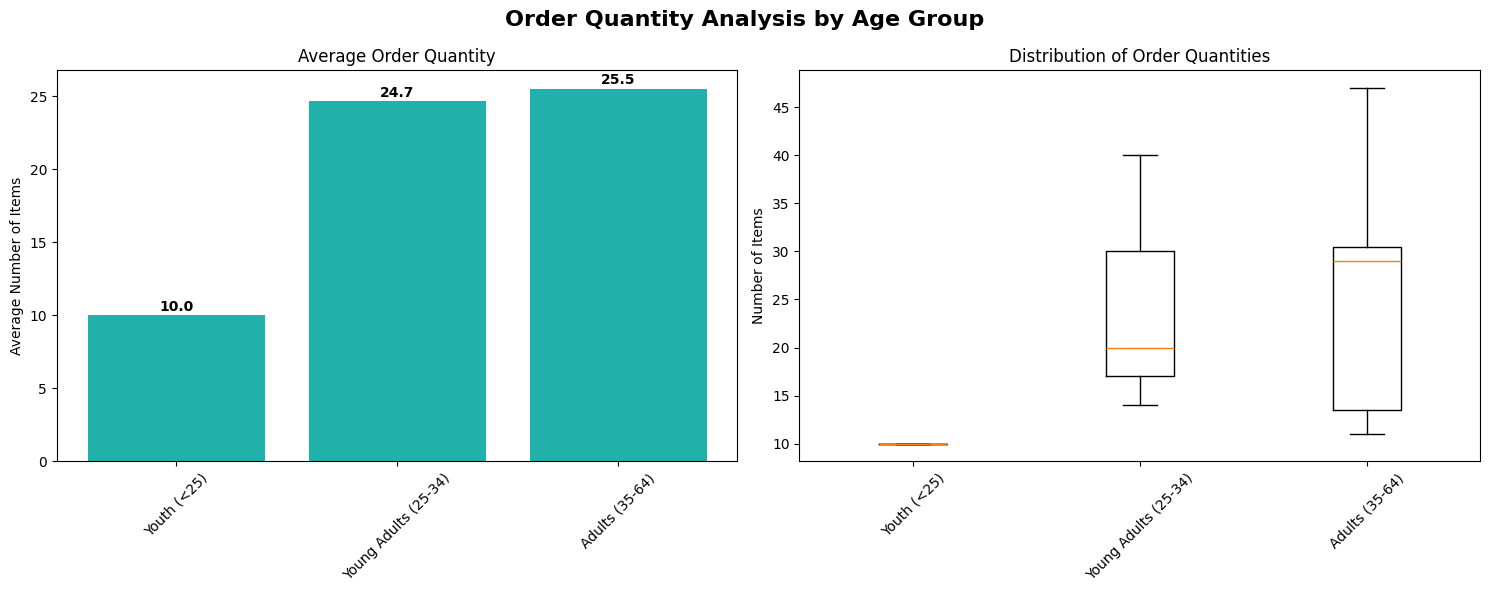


Summary Statistics (Mean Order Quantity by Age Group):
Age_Group
Youth (<25)             10.00
Young Adults (25-34)    24.67
Adults (35-64)          25.50
Name: Order_Quantity, dtype: float64


In [95]:
# --- Age Group by Order Quantity Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Data
df = pd.read_csv('Bike_Sales.csv')

# 2. Clean the 'Order_Quantity' Column (CRITICAL STEP)
# This ensures it's a number and not text with symbols
if 'Order_Quantity' in df.columns:
    df['Order_Quantity'] = df['Order_Quantity'].astype(str)
    df['Order_Quantity'] = df['Order_Quantity'].str.replace(',', '', regex=False)
    df['Order_Quantity'] = pd.to_numeric(df['Order_Quantity'], errors='coerce')
    
print("Data cleaned and ready.")

# 3. Check the unique age groups in the data
print("Age Groups in the dataset:")
print(df['Age_Group'].unique())

# 4. Create a Figure with two subplots: one for the average, one for the distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) # 1 row, 2 columns
fig.suptitle('Order Quantity Analysis by Age Group', fontsize=16, fontweight='bold')

# --- PLOT 1: Average Order Quantity by Age Group (Bar Chart) ---
# Aggregate the data: Calculate the MEAN order quantity for each age group
avg_order_by_age = df.groupby('Age_Group')['Order_Quantity'].mean().sort_values()

# Plot the averages
bars = ax1.bar(avg_order_by_age.index, avg_order_by_age.values, color='lightseagreen')
ax1.set_title('Average Order Quantity')
ax1.set_ylabel('Average Number of Items')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f}', # Format to one decimal place
            ha='center', va='bottom', fontweight='bold')

# --- PLOT 2: Distribution of Order Quantity by Age Group (Box Plot) ---
# Prepare data for box plot: a list of order quantities for each age group
boxplot_data = []
age_groups_sorted = avg_order_by_age.index.tolist() # Use the same order as the bar chart

for group in age_groups_sorted:
    # Get all order quantities for this specific age group
    group_data = df[df['Age_Group'] == group]['Order_Quantity'].dropna()
    boxplot_data.append(group_data)

# Create the boxplot
boxplot = ax2.boxplot(boxplot_data, labels=age_groups_sorted)
ax2.set_title('Distribution of Order Quantities')
ax2.set_ylabel('Number of Items')
ax2.tick_params(axis='x', rotation=45)

# 5. Adjust layout and display
plt.tight_layout()
plt.show()

# 6. Print the underlying summary statistics for a quantitative analysis
print("\nSummary Statistics (Mean Order Quantity by Age Group):")
print(avg_order_by_age.round(2))

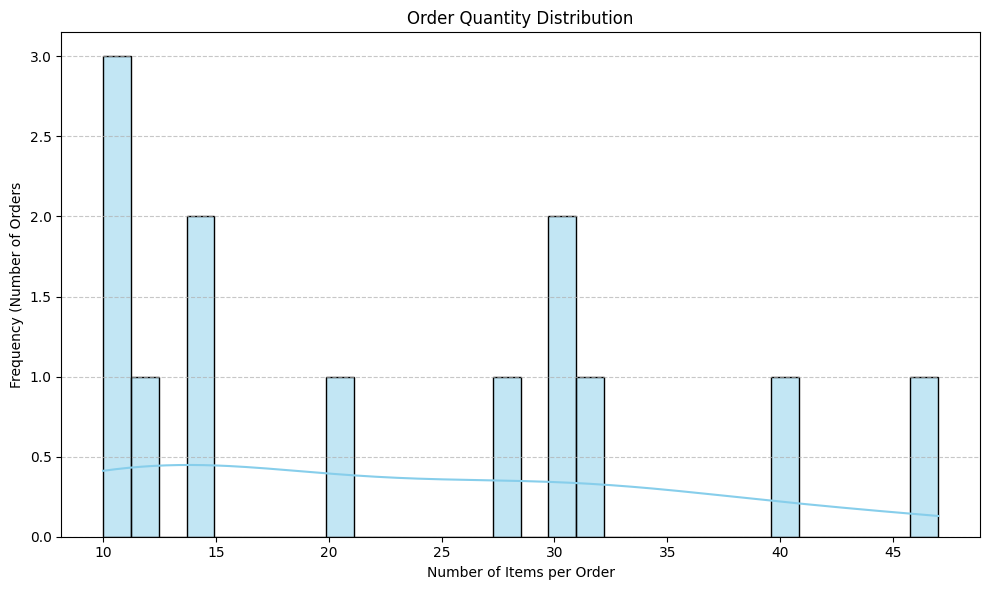

In [ ]:
# Get the data
order_quantities = df_clean['Order_Quantity']

# Load data
df = pd.read_csv("Bike_Sales.csv")

# Plot Order_Quantity Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Order_Quantity', kde=True, bins=30, color="skyblue")
plt.title('Order Quantity Distribution')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency (Number of Orders')
plt.grid(True, linestyle='--', alpha=0.7, axis='y') # Add grid on y-axis
plt.tight_layout()
plt.show()

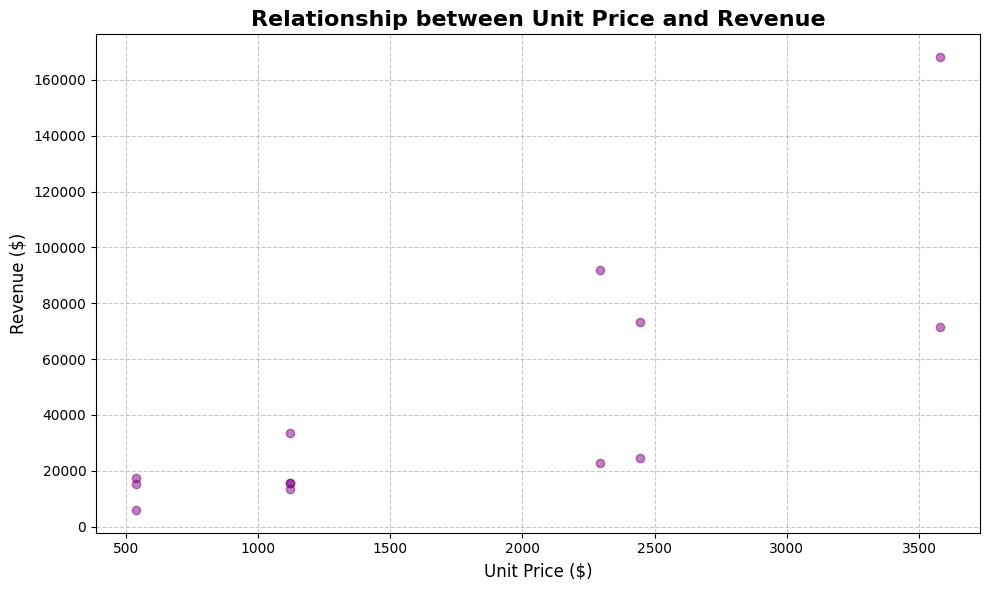

In [82]:

# 1. Load the data into a DataFrame named 'df'
df = pd.read_csv('Bike_Sales.csv')

# 2. Clean the specific columns you want to plot
# Clean 'Unit_Price'
df['Unit_Price'] = df['Unit_Price'].astype(str)
df['Unit_Price'] = df['Unit_Price'].str.replace('$', '', regex=False)
df['Unit_Price'] = df['Unit_Price'].str.replace(',', '', regex=False)
df['Unit_Price'] = pd.to_numeric(df['Unit_Price'], errors='coerce')

# Clean 'Revenue'
df['Revenue'] = df['Revenue'].astype(str)
df['Revenue'] = df['Revenue'].str.replace('$', '', regex=False)
df['Revenue'] = df['Revenue'].str.replace(',', '', regex=False)
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# 3. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit_Price'], df['Revenue'], alpha=0.5, color='purple') # Use 'df' now, not 'df_clean'

# Customize the plot
plt.title('Relationship between Unit Price and Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Unit Price ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()